In [1]:
# autoreload拡張機能を読み込む
%load_ext autoreload

# すべてのモジュールをセル実行前に自動で再読み込みするモードに設定
%autoreload 2

In [2]:
# p92 価値反復法の価値反復コード
# 価値関数の更新は２つ一斉に行う
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

for _ in range(100):
    new_V['L1'] = 0.5 * (-1 +0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5  * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    V = new_V.copy()
    print(V)
print("最終の価値関数:", V)

# 100回で有効数字4桁の制度で収束
# 真の値はV['L1'] = -2.25, V['L2'] = -2.75


{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

In [3]:
# p93 価値反復法の価値反復コード(収束判定あり)
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

cnt = 0
while True:
    new_V['L1'] = 0.5 * (-1 +0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5  * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

    # 更新された変化量の最大値
    delta = max(abs(new_V['L1'] - V['L1']), abs(new_V['L2'] - V['L2']))
    V = new_V.copy()
    cnt += 1
    if delta < 1e-4:  # 収束判定
        print(f"収束までの反復回数: {cnt}")
        print("最終の価値関数:", V)
        break


収束までの反復回数: 76
最終の価値関数: {'L1': -2.249167525908671, 'L2': -2.749167525908671}


In [4]:
# p95 価値反復法の価値反復コード(収束判定あり、上書き方式)
# 価値関数の更新は1つずつ順番に行う(動的計画法っぽい方法)
V = {'L1': 0.0, 'L2': 0.0}

cnt = 0
while True:
    t = 0.5 * (-1 +0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5  * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 1e-4:  # 収束判定
        print(f"収束までの反復回数: {cnt}")
        print("最終の価値関数:", V)
        break

    # 更新回数が減る

収束までの反復回数: 60
最終の価値関数: {'L1': -2.2493782177156936, 'L2': -2.7494201578106514}


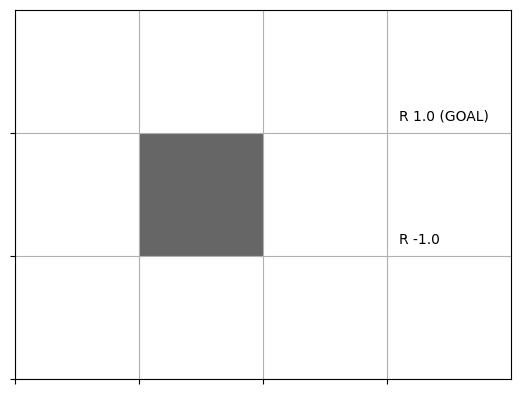

In [5]:
# gridworldのインポート
from common.gridworld import GridWorld

env = GridWorld()
env.render_v()

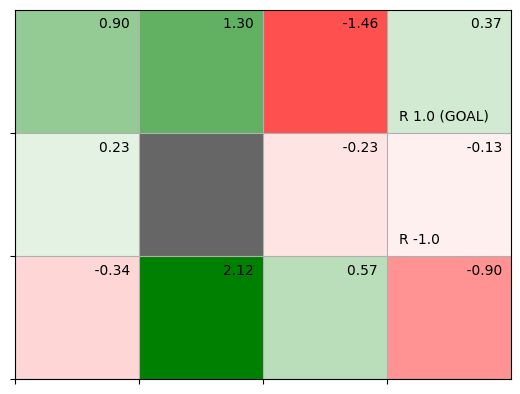

In [6]:
# p101 render_v()の実行
# ランダムに決定した価値関数の表示
import numpy as np
V = {}
for state in env.states():
    V[state] = np.random.randn()
env.render_v(V)

In [7]:
# p103 辞書型の初期化
from common.gridworld import GridWorld

env = GridWorld()
V = {}  # 空の辞書を初期化
for state in env.states():
    V[state] = 0  # 各状態の価値を0に初期化

state = (1, 2)
print(V[state])  # 初期値は0

0


In [8]:
# p103 辞書型を初期化するcollection.defaultdictの使用
from common.gridworld import GridWorld
from collections import defaultdict # defaultdictをインポート

env = GridWorld()
V = defaultdict((lambda: 0))

state = (1, 2)

# 定義されてないキーにアクセスしたタイミングで、自動的にlambdaで初期化される
print(V[state])  # 初期値は0

0


In [9]:
# p104 ランダムな方策piを定義

# 辞書型の中に辞書型を入れる
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})  # 各方向に均等に遷移する方策

state = (1, 2)
print(pi[state])  # 各方向に均等に遷移する方策が表示される

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [ ]:
# p105 方策評価の1ステップの実装
# pi: 方策, V: 価値関数, env: 環境, gamma: 割引率
# 方策piに基づいて、価値関数Vを更新(On-policy)
def eval_onestep(pi, V, env, gamma=0.9):
    # 各状態にアクセス
    for state in env.states():
        if state == env.goal_state: # ゴールの状態は価値を0に設定
            V[state] = 0
            continue

        action_probs = pi[state]  # 現在の状態における方策
        new_V = 0

        # 各行動にアクセス
        # actionは行動のインデックス、action_probはその行動の確率
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)  # 次の状態を取得
            r = env.reward(state, action, next_state)  # 報酬を取得

            # 新しい価値関数の計算
            new_V += action_prob * (r + gamma * V[next_state])

        V[state] = new_V  # 状態の価値を更新
    return V



In [ ]:
# p106 反復方策評価のメソッド
def policy_eval(pi, V, env, gamma, threshold=1e-3):
    while True:
        old_V = V.copy()  # 更新前の価値関数を保存
        V = eval_onestep(pi, V, env, gamma)

        # 収束判定
        delta = max(abs(V[state] - old_V[state]) for state in V.keys())
        if delta < threshold:
            break

    return V

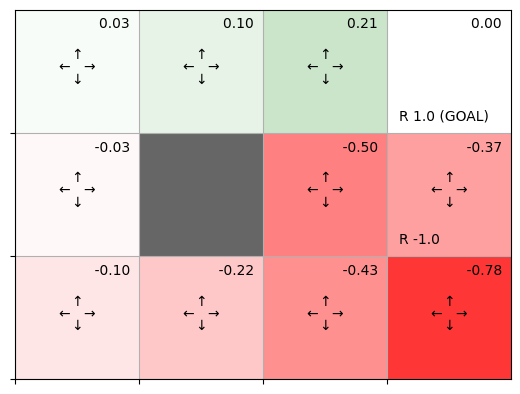

In [12]:
# p107 反復方策評価の実行
from collections import defaultdict  # defaultdictをインポート
from common.gridworld import GridWorld


env = GridWorld()
gamma = 0.9  # 割引率の設定
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})  # 各状態の方策をランダムな方策に設定
V = defaultdict(lambda: 0)  # 各状態の価値を0に初期化

V = policy_eval(pi, V, env, gamma)

env.render_v(V, pi)  # 価値関数の表示

In [13]:
# p113 最大値を持つキーを取得する関数(argmax関数)の実装
def argmax(d):
    # 最大値を取得
    max_value = max(d.values())
    max_key = 0
    # 最大値を持つキーを取得
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key


In [14]:
# 価値関数のgreedy化によってpiを更新する関数の実装
# 出力は、各状態における方策 μ'を表す辞書型
def greedy_policy(V, env, gamma):

    pi = {} # key : 状態, value : 方策pi(key : 行動, value : 確率)の辞書型
    
    for state in env.states():

        action_values = {}  # key : 行動, value : 行動価値関数の辞書型

        for action in env.actions():

            # 各行動の価値を計算
            next_state = env.next_state(state, action)  # s' = f(s,a) に対応
            r = env.reward(state, action, next_state)   # r(s,a,s') に対応
            value = r + gamma * V[next_state]           # r　+　γv を計算

            # 行動価値関数を更新
            action_values[action] = value

        # 最大の行動価値を持つ行動を選択
        max_action = argmax(action_values)

        # 選択した行動に確率1.0を設定
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs
    return pi

In [ ]:
# 方策反復法の実装
# gamma : 割引率, threshold : 収束条件, is_render : 各更新で状態を表示するか
def policy_iter(env, gamma, threshold=1e-3, is_render=False):
    # 初期化
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})  # ランダムな方策
    V = defaultdict(lambda: 0)  # 各状態の価値を0に初期化

    while True:

        # 方策評価
        V = policy_eval(pi, V, env, gamma, threshold)

        # 方策改善
        new_pi = greedy_policy(V, env, gamma)

        if is_render:
            env.render_v(V, new_pi)

        # 方策が変わらなければ終了
        if new_pi == pi:
            break
        pi = new_pi

    return pi

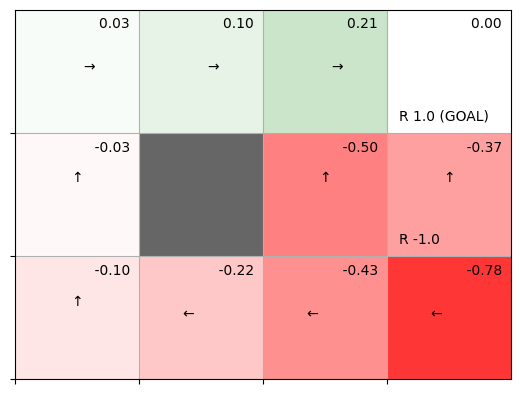

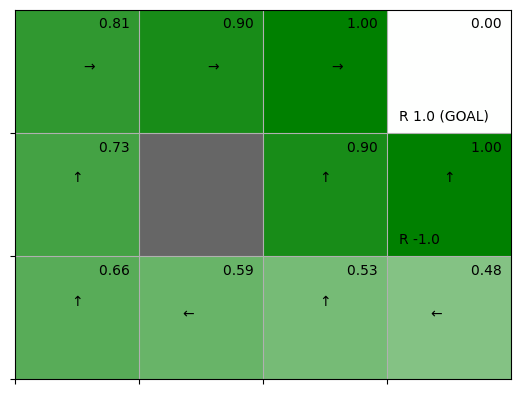

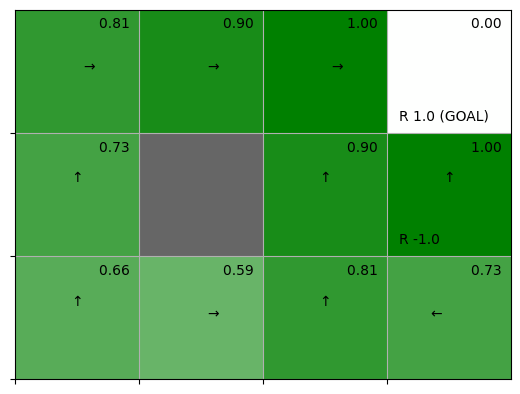

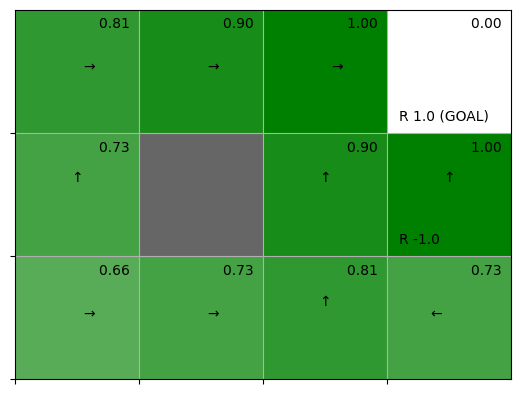

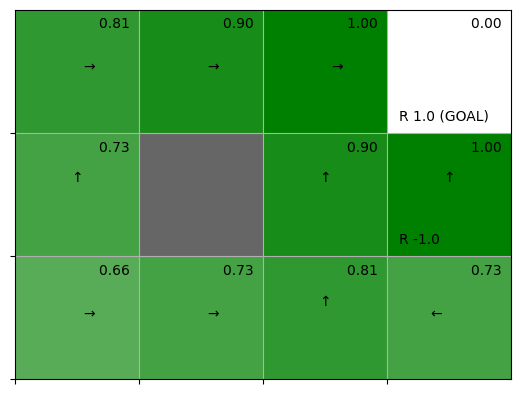

In [16]:
# 方策反復法の実行
env = GridWorld()
gamma = 0.9  # 割引率の設定
pi = policy_iter(env, gamma, is_render=True)


In [17]:
# p124 価値反復法の1ステップの実装
# 価値関数の更新に方策piを使わない(全行動を確かめる)のでoff-policy
def value_iter_onestep(V, env, gamma):
    for state in env.states(): # 各状態にアクセス
        # ゴールの状態は常に価値を0に設定
        if state == env.goal_state:
            V[state] = 0
            continue
        action_values = []
        for action in env.actions(): # 各行動にアクセス
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            # 新しい価値関数の計算
            action_values.append(value)

        # 各行動で更新した状態価値の最大値を選択
        V[state] = max(action_values)
    return V

In [18]:
# p124 価値反復法の価値反復コード(収束判定あり)
def value_iter(V, env, gamma, threshold=1e-3, is_render=False):
    while True:
        if is_render:
            env.render_v(V)

        # 価値関数の更新
        old_V = V.copy()
        V = value_iter_onestep(V, env, gamma)

        # 収束判定
        delta = max(abs(V[state] - old_V[state]) for state in V.keys())
        if delta < threshold:
            break
    return V

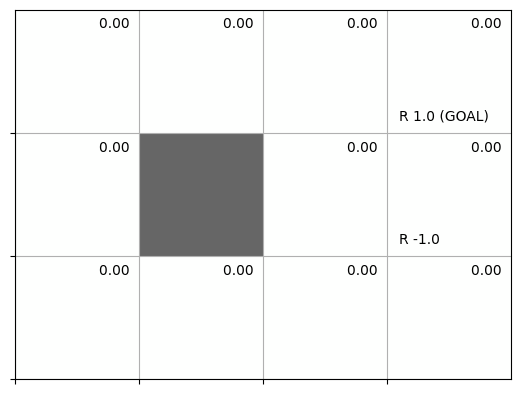

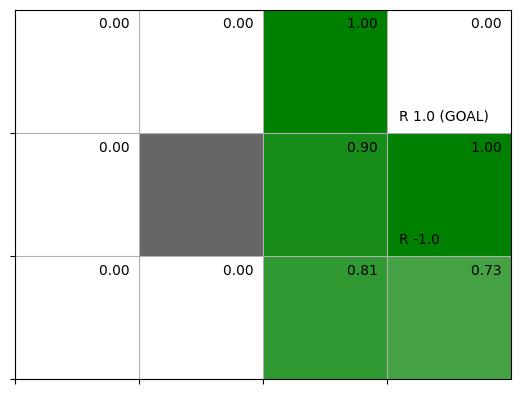

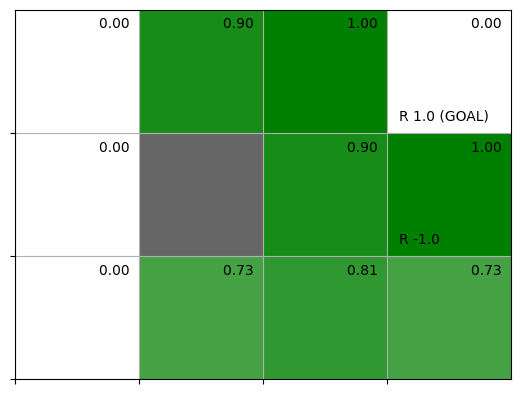

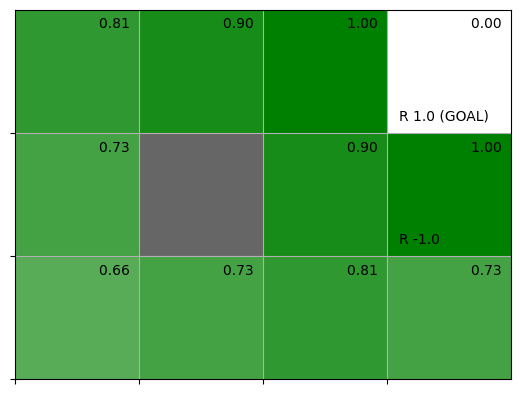

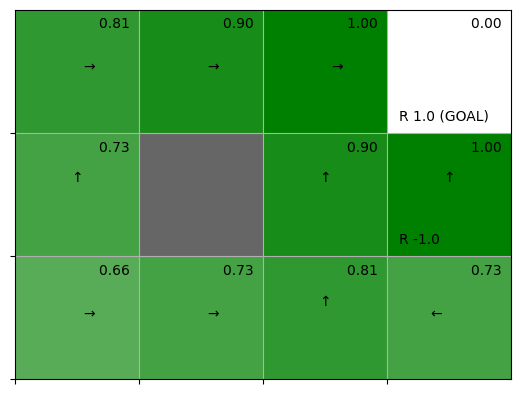

In [19]:
# p125 価値反復法の実行
from common.gridworld import GridWorld

V = defaultdict(lambda: 0)  # 各状態の価値を0に初期化
env = GridWorld()
gamma = 0.9  # 割引率の設定

V = value_iter(V, env, gamma, is_render=True)

# 価値関数からgreedy化して方策を生成
pi = greedy_policy(V, env, gamma)
env.render_v(V, pi)  # 価値関数の表示